In [3]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [4]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

In [5]:
import pandas as pd

In [8]:
df = pd.read_sql_query("select * from agg.tidy_data_30min", conn)

/var/folders/vt/5wzq72vd2mj_qqq_fwp77h_40000gq/T/ipykernel_73666/2135354995.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("select * from agg.tidy_data_30min", conn)


In [12]:
# make a correlation matrix 
df.iloc[:,8:].corr()

,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
season,1.000000,-0.043426,0.027924,-0.022761,-0.000955,-0.204828,0.100404,0.076801,-0.208717,-0.102445,-0.318099,-0.193010,0.005066
net_load,-0.043426,1.000000,0.021068,0.051042,0.001558,0.028492,-0.110012,-0.089992,0.208061,0.121049,0.128178,0.130552,0.001735
precipitation,0.027924,0.021068,1.000000,0.586897,-0.004699,0.263321,-0.132784,-0.187193,0.104233,0.124778,0.144142,0.150253,0.009288
precipitation_probability,-0.022761,0.051042,0.586897,1.000000,0.222040,0.535970,-0.264652,-0.364403,0.254565,0.294474,0.339295,0.346471,-0.020463
wind_direction,-0.000955,0.001558,-0.004699,0.222040,1.000000,0.188659,-0.002905,-0.045069,0.009121,0.028600,0.013705,0.040516,0.011056
wind_speed,-0.204828,0.028492,0.263321,0.535970,0.188659,1.000000,0.008543,-0.039792,0.142392,0.068693,0.259326,0.178866,0.050831
solar_radiation,0.100404,-0.110012,-0.132784,-0.264652,-0.002905,0.008543,1.000000,0.797562,-0.542068,-0.758254,-0.526213,-0.642143,0.019689
sunshine_duration,0.076801,-0.089992,-0.187193,-0.364403,-0.045069,-0.039792,0.797562,1.000000,-0.441065,-0.543584,-0.455924,-0.515511,0.028860
avg_net_load,-0.208717,0.208061,0.104233,0.254565,0.009121,0.142392,-0.542068,-0.441065,1.000000,0.581795,0.616059,0.627469,0.008337
q25_net_load,-0.102445,0.121049,0.124778,0.294474,0.028600,0.068693,-0.758254,-0.543584,0.581795,1.000000,0.547321,0.817678,-0.003761


In [15]:
#check for the sites where correlation of net load with other variables is high

site_corr = {}
for site in df['site'].unique():
    cor = df[df['site']==site].iloc[:,8:].corr()['net_load']
    site_corr[site] = cor

In [18]:
df_corr = pd.DataFrame(site_corr)

In [19]:
#delete all the rows that have "net_load" in the name
df_corr = df_corr[df_corr.index.str.contains("net_load")==False]

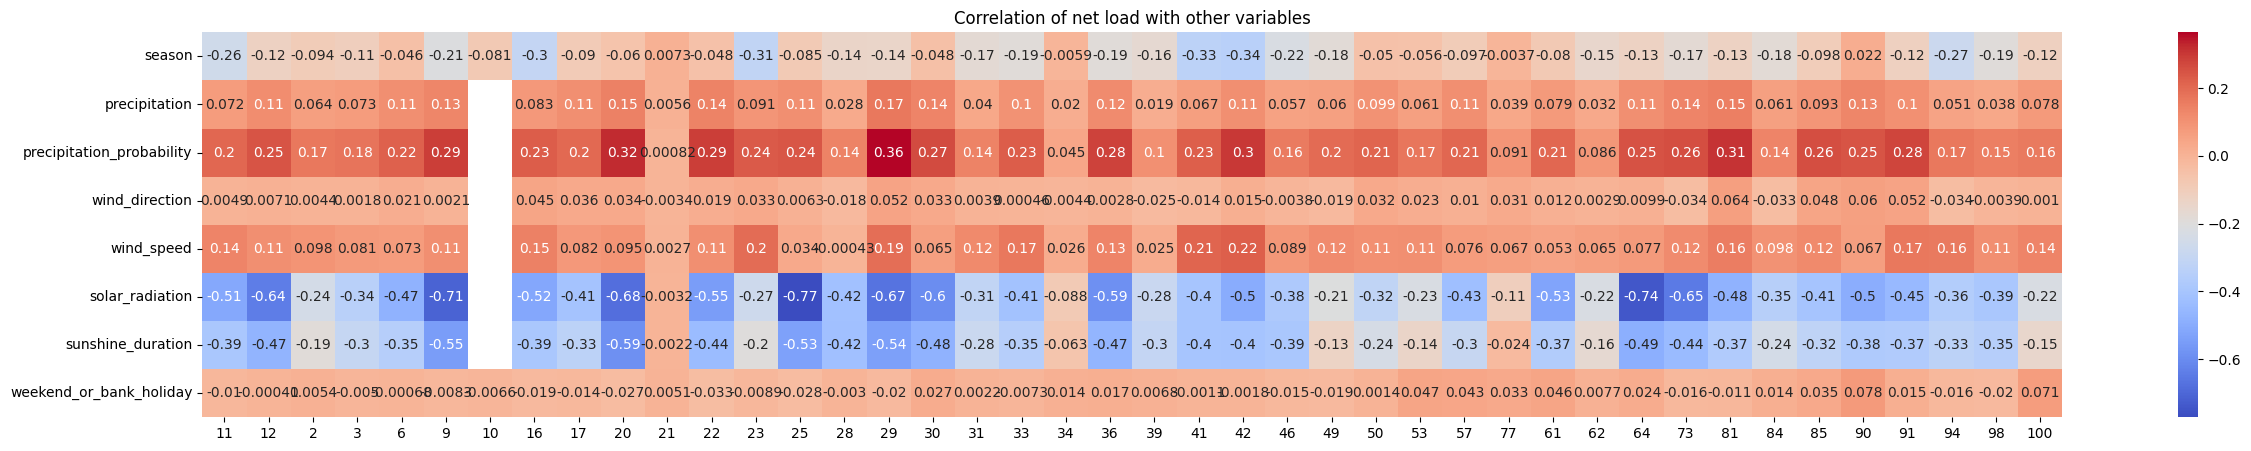

In [25]:
#plot df_corr as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation of net load with other variables")
plt.show()

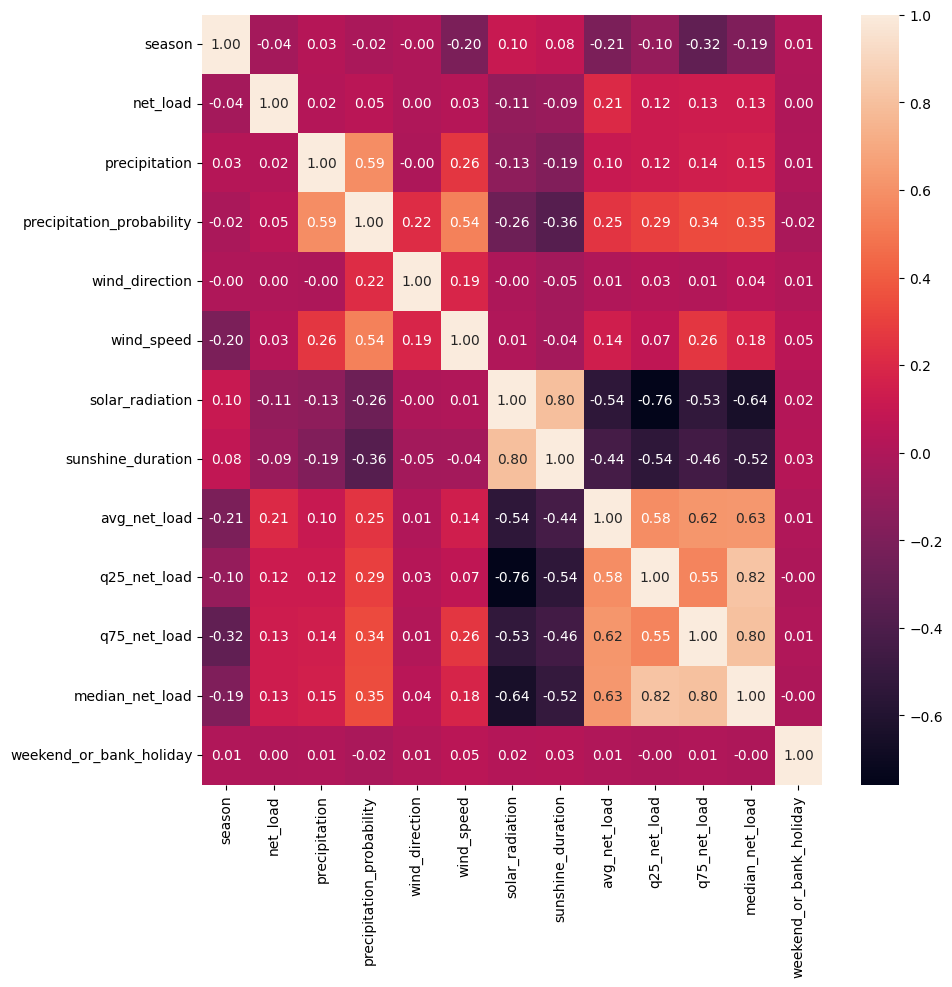

In [13]:
# make correlation matrix a little prettier
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,8:].corr(), annot=True, fmt=".2f")
plt.show()